In [2]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(0)

In [4]:
def minmax_scaler(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data,0) - np.min(data,0)
    return numerator / (denominator + 1e-7)



In [8]:
def build_dataset(time_series, seq_length):
    dataX=[]
    dataY=[]
    for i in range(0, len(time_series)-seq_length):
        _x = time_series[i:i+seq_length,:]
        _y = time_series[i+seq_length,[-1]]
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [9]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [11]:
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]

train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size-seq_length:]

train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

trainX, trainY = build_dataset(train_set,seq_length)
testX, testY = build_dataset(test_set,seq_length)

trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

In [13]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net,self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)
        
    def forward(self,x):
        x, _status = self.rnn(x)
        x = self.fc(x[:,-1])
        return x
    
net = Net(data_dim, hidden_dim, output_dim,1)

In [14]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [16]:
for i in range(iterations):
    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.2271038293838501
1 0.18341004848480225
2 0.15106485784053802
3 0.126123309135437
4 0.10598737746477127
5 0.08915026485919952
6 0.0749373733997345
7 0.0632796511054039
8 0.054497018456459045
9 0.0490250363945961
10 0.04693543538451195
11 0.0473177395761013
12 0.04838307201862335
13 0.04839528724551201
14 0.04633862152695656
15 0.04207933321595192
16 0.03620390594005585
17 0.02966446429491043
18 0.023388823494315147
19 0.018012961372733116
20 0.013801710680127144
21 0.01071511022746563
22 0.008532301522791386
23 0.0069764661602675915
24 0.00582447974011302
25 0.0049874563701450825
26 0.004524606745690107
27 0.004554221406579018
28 0.005089025013148785
29 0.00591990677639842
30 0.0066840206272900105
31 0.0070722633972764015
32 0.006974081974476576
33 0.006472333800047636
34 0.005754034034907818
35 0.005015072878450155
36 0.004395428113639355
37 0.003953651990741491
38 0.0036764275282621384
39 0.003510785987600684
40 0.003401215188205242
41 0.0033151337411254644
42 0.003248984226956963

325 0.0014484013663604856
326 0.0014467821456491947
327 0.001445169560611248
328 0.001443563844077289
329 0.001441964996047318
330 0.0014403732493519783
331 0.0014387876726686954
332 0.0014372090809047222
333 0.0014356371248140931
334 0.0014340718043968081
335 0.00143251265399158
336 0.0014309602556750178
337 0.0014294140273705125
338 0.001427874551154673
339 0.0014263410121202469
340 0.0014248138759285212
341 0.001423293142579496
342 0.0014217783464118838
343 0.0014202697202563286
344 0.0014187672641128302
345 0.0014172710943967104
346 0.0014157806290313601
347 0.001414296799339354
348 0.001412818324752152
349 0.0014113461365923285
350 0.0014098798856139183
351 0.0014084194554015994
352 0.0014069651952013373
353 0.0014055168721824884
354 0.0014040741370990872
355 0.001402637455612421
356 0.0014012069441378117
357 0.0013997821370139718
358 0.0013983632670715451
359 0.0013969503343105316
360 0.0013955433387309313
361 0.0013941422803327441
362 0.0013927470427006483
363 0.0013913583243265

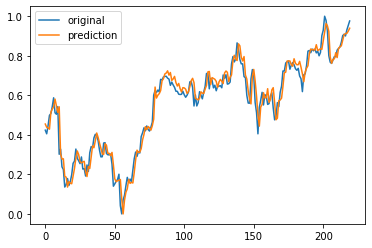

In [17]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(["original", "prediction"])
plt.show()